In [63]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.ndimage import affine_transform
import surfa as sf
import matplotlib.colors as mcolors
import seaborn as sns

In [64]:
slice_num=56

In [65]:
subjects = ['305_81yrOld','366_53yrOld_edited','388_21yrOld','401_5yrOld']
subject = [2]

In [66]:
def load_lh_frontal_volumes(subject):
    path=f'/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/{subject}_edited_gy-sulc_Output/'
    
    #lh_caudalmiddlefrontal
    lh_f_cmf_volume=nib.load(f'{path}/frontalROI/ctx-lh-caudalmiddlefrontal-reg-nearest.nii')
    lh_f_cmf=lh_f_cmf_volume.get_fdata()
    #lh_precentral
    lh_f_pc_volume=nib.load(f'{path}/frontalROI/ctx-lh-precentral-reg-nearest.nii')
    lh_f_pc=lh_f_pc_volume.get_fdata()
    #lh_rostralmiddlefrontal
    lh_f_rmf_volume=nib.load(f'{path}/frontalROI/ctx-lh-rostralmiddlefrontal-reg-nearest.nii')
    lh_f_rmf=lh_f_rmf_volume.get_fdata()
    #ctx-lh-superiorfronta
    lh_f_sf_volume=nib.load(f'{path}/frontalROI/ctx-lh-superiorfrontal-reg-nearest.nii')
    lh_f_sf=lh_f_sf_volume.get_fdata()

    lh_frontal_roi_data=[lh_f_cmf,lh_f_pc,lh_f_rmf,lh_f_sf]
    lh_frontal_roi_name=['lh_cmf','lh_pc','lh_rmf','lh_sf']

    return lh_frontal_roi_name, lh_frontal_roi_data

def load_rh_frontal_volumes(subject):
    path=f'/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/{subject}_edited_gy-sulc_Output/'
    
    # rh_caudalmiddlefrontal
    rh_f_cmf_volume = nib.load(f'{path}/frontalROI/ctx-rh-caudalmiddlefrontal-reg-nearest.nii')
    rh_f_cmf = rh_f_cmf_volume.get_fdata()
    # rh_frontalpole
    rh_f_fp_volume = nib.load(f'{path}/frontalROI/ctx-rh-frontalpole-reg-nearest.nii')
    rh_f_fp = rh_f_fp_volume.get_fdata()
    # rh_parsorbitalis
    rh_f_po_volume = nib.load(f'{path}/frontalROI/ctx-rh-parsorbitalis-reg-nearest.nii')
    rh_f_po = rh_f_po_volume.get_fdata()
    # rh_precentral
    rh_f_pc_volume = nib.load(f'{path}/frontalROI/ctx-rh-precentral-reg-nearest.nii')
    rh_f_pc = rh_f_pc_volume.get_fdata()
    # rh_rostralmiddlefrontal
    rh_f_rmf_volume = nib.load(f'{path}/frontalROI/ctx-rh-rostralmiddlefrontal-reg-nearest.nii')
    rh_f_rmf = rh_f_rmf_volume.get_fdata()
    # ctx-rh-superiorfrontal
    rh_f_sf_volume = nib.load(f'{path}/frontalROI/ctx-rh-superiorfrontal-reg-nearest.nii')
    rh_f_sf = rh_f_sf_volume.get_fdata()
    rh_frontal_roi_data = [rh_f_cmf,rh_f_pc, rh_f_rmf, rh_f_sf]
    rh_frontal_roi_name = ['rh_cmf', 'rh_pc', 'rh_rmf', 'rh_sf']

    return rh_frontal_roi_name, rh_frontal_roi_data

In [67]:
#lh_frontal_roi_name, lh_frontal_roi_data = load_lh_frontal_volumes(subjects[2])
#rh_frontal_roi_name, rh_frontal_roi_data = load_rh_frontal_volumes(subjects[2])

In [68]:
def load_lh_volumes(subject):
    path=f'/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/{subject}_edited_gy-sulc_Output/'
    lh_gyri_volume=nib.load(f'{path}lh_gyri-reg-nearest.nii')
    lh_gyri=lh_gyri_volume.get_fdata()
    
    lh_sulci_volume=nib.load(f'{path}lh_sulci-reg-nearest.nii')
    lh_sulci=lh_sulci_volume.get_fdata()

    return lh_gyri, lh_sulci

def load_rh_volumes(subject):
    path=f'/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/{subject}_edited_gy-sulc_Output/'
    rh_gyri_volume = nib.load(f'{path}rh_gyri-reg-nearest.nii')
    rh_gyri = rh_gyri_volume.get_fdata()

    rh_sulci_volume = nib.load(f'{path}rh_sulci-reg-nearest.nii')
    rh_sulci = rh_sulci_volume.get_fdata()
    
    return rh_gyri, rh_sulci


In [69]:
def load_mu(subject):
    path=f'/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/{subject}_edited_gy-sulc_Output/'
    mu_volume=nib.load(f'{path}/Mu.nii')
    mu_with_csf=mu_volume.get_fdata()
    
    csf_volume=nib.load(f'{path}register_nu_csf.nii')
    csf=csf_volume.get_fdata()
    csf_mask=(csf < .5).astype(int)
    mu = mu_with_csf*csf_mask

    return mu

In [70]:
def lh_mu_gyri_sulci(mu, lh_gyri, lh_sulci):
    mu_lh_gyri = mu*lh_gyri
    mu_lh_sulci = mu*lh_sulci
    return mu_lh_gyri,mu_lh_sulci

def rh_mu_gyri_sulci(mu, rh_gyri, rh_sulci):
    mu_rh_gyri = mu * rh_gyri
    mu_rh_sulci = mu * rh_sulci
    return mu_rh_gyri,mu_rh_sulci
    



In [71]:
lh_frontal_roi_name, lh_frontal_roi_data = load_lh_frontal_volumes(subjects[2])
rh_frontal_roi_name, rh_frontal_roi_data = load_rh_frontal_volumes(subjects[2])

In [74]:
lh_gyri, lh_sulci = load_lh_volumes(subjects[2])
rh_gyri, rh_sulci = load_rh_volumes(subjects[2])

In [75]:
mu = load_mu(subjects[2])

mu_lh_gyri,mu_lh_sulci = lh_mu_gyri_sulci(mu, lh_gyri, lh_sulci)
mu_rh_gyri,mu_rh_sulci = rh_mu_gyri_sulci(mu, rh_gyri, rh_sulci)

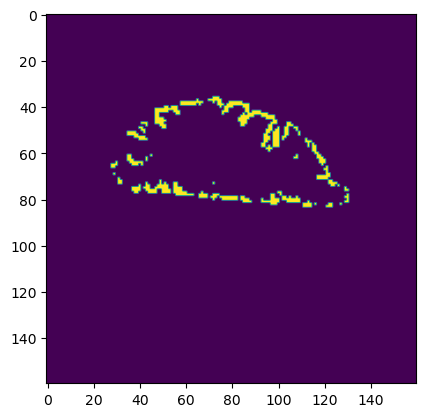

In [76]:
plt.imshow(lh_gyri[:,:,slice_num])

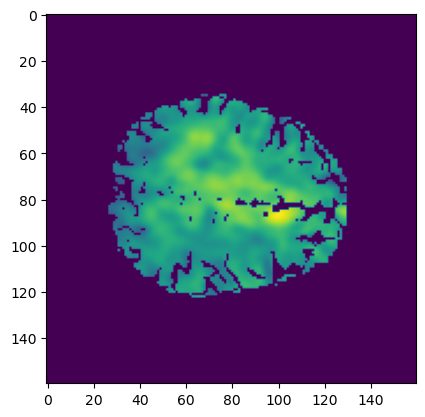

In [77]:
plt.imshow(mu[:,:,slice_num])

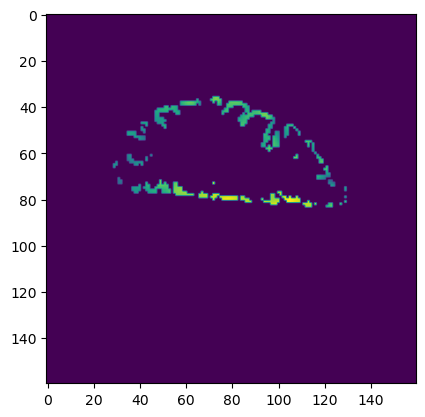

In [78]:
plt.imshow(mu_lh_gyri[:,:,slice_num])

In [79]:
def average(mu_lh_gyri,mu_lh_sulci,mu_rh_gyri,mu_rh_sulci):
    mu_lh_gyri_flat = mu_lh_gyri.flatten()
    mu_lh_gyri_flat[mu_lh_gyri_flat == 0] = np.nan
    
    mu_lh_sulci_flat = mu_lh_sulci.flatten()
    mu_lh_sulci_flat[mu_lh_sulci_flat == 0] = np.nan
    
    mu_rh_gyri_flat = mu_rh_gyri.flatten()
    mu_rh_gyri_flat[mu_rh_gyri_flat == 0] = np.nan
    
    mu_rh_sulci_flat = mu_rh_sulci.flatten()
    mu_rh_sulci_flat[mu_rh_sulci_flat == 0] = np.nan

    all_gyri = np.concatenate([mu_lh_gyri_flat, mu_rh_gyri_flat],axis=0)
    all_sulci = np.concatenate([mu_lh_sulci_flat, mu_rh_sulci_flat],axis=0)

    mean_gyri = np.nanmean(all_gyri)
    mean_sulci = np.nanmean(all_sulci)

    percent_diff = (abs(mean_gyri - mean_sulci) / ((mean_gyri + mean_sulci) / 2)) * 100

    return mean_gyri, mean_sulci, percent_diff

In [80]:
average(mu_lh_gyri,mu_lh_sulci,mu_rh_gyri,mu_rh_sulci)

(2377.6145639827823, 2542.3949071273455, 6.698375038183936)

In [81]:
def whole_brain_histo(mu_lh_gyri,mu_lh_sulci,mu_rh_gyri,mu_rh_sulci):
    plt.figure(figsize=(10, 6))
    
    mu_lh_gyri_flat = mu_lh_gyri.flatten()
    mu_lh_gyri_flat[mu_lh_gyri_flat == 0] = np.nan
    
    mu_lh_sulci_flat = mu_lh_sulci.flatten()
    mu_lh_sulci_flat[mu_lh_sulci_flat == 0] = np.nan
    
    mu_rh_gyri_flat = mu_rh_gyri.flatten()
    mu_rh_gyri_flat[mu_rh_gyri_flat == 0] = np.nan
    
    mu_rh_sulci_flat = mu_rh_sulci.flatten()
    mu_rh_sulci_flat[mu_rh_sulci_flat == 0] = np.nan
    
    all_gyri = np.concatenate([mu_lh_gyri_flat, mu_rh_gyri_flat],axis=0)
    all_sulci = np.concatenate([mu_lh_sulci_flat, mu_rh_sulci_flat],axis=0)
    
    plt.hist(all_gyri/ 1000, bins=1000, alpha=0.5, label='Gyri', color='Green')
    plt.hist(all_sulci/ 1000, bins=1000, alpha=0.5, label='Sulci', color='Purple')
    
    plt.legend(loc='best')
    plt.xlabel('Stiffness (kPa)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Gyri vs Sulci Stiffness')
    plt.xlim(0,5)
    
    plt.savefig('temp.png')
    plt.show()


In [82]:
np.shape(mu_lh_gyri)

(160, 160, 80)

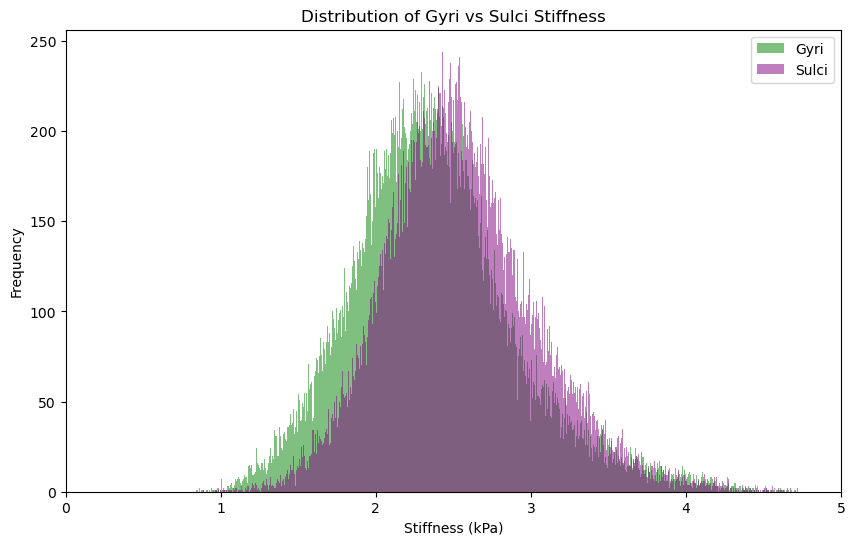

In [83]:
whole_brain_histo(mu_lh_gyri,mu_lh_sulci,mu_rh_gyri,mu_rh_sulci)


 
whole_brain_histo(mu_lh_gyri,mu_lh_sulci,mu_rh_gyri,mu_rh_sulci)

In [84]:
def roi_dict(roi_name,roi_data,mu_gyri,mu_sulci):
    roi_gyri_mu = {}
    for i in range(len(roi_data)):
        temp = roi_name[i]
        roi_gyri_mu[temp] = mu_gyri * roi_data[i]

    roi_sulci_mu = {}
    for i in range(len(roi_data)):
        temp = roi_name[i]
        roi_sulci_mu[temp] = mu_sulci * roi_data[i]

    return roi_gyri_mu,roi_sulci_mu

In [85]:
def roi_count (roi_sulci_mu,roi_gyri_mu):
    for roi in roi_sulci_mu.keys():
        print(f'gyri_{roi}: {np.count_nonzero(roi_gyri_mu[roi])}')
        print(f'sulci_{roi}: {np.count_nonzero(roi_sulci_mu[roi])}')
        print('')

In [86]:
roi_lh_gyri_mu,roi_lh_sulci_mu = roi_dict(lh_frontal_roi_name, lh_frontal_roi_data, mu_lh_gyri, mu_lh_sulci)
roi_rh_gyri_mu,roi_rh_sulci_mu = roi_dict(rh_frontal_roi_name, rh_frontal_roi_data, mu_rh_gyri, mu_rh_sulci)
roi_count(roi_rh_sulci_mu,roi_rh_gyri_mu)
roi_count(roi_lh_sulci_mu,roi_lh_gyri_mu)

gyri_rh_cmf: 514
sulci_rh_cmf: 537

gyri_rh_pc: 1907
sulci_rh_pc: 1684

gyri_rh_rmf: 1017
sulci_rh_rmf: 1193

gyri_rh_sf: 1960
sulci_rh_sf: 1900

gyri_lh_cmf: 986
sulci_lh_cmf: 768

gyri_lh_pc: 1896
sulci_lh_pc: 1654

gyri_lh_rmf: 1551
sulci_lh_rmf: 1732

gyri_lh_sf: 1909
sulci_lh_sf: 2441



In [87]:
def roi_his(roi_rh_gyri_mu, roi_rh_sulci_mu, roi_lh_gyri_mu, roi_lh_sulci_mu):
    # Create a 2-row, 3-column layout for subplots (left and right hemisphere)
    rows = 2
    cols = 4
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(35, 15))
    
    axes = axes.flatten()

    gyri_counts = []
    sulci_counts = []

    names = ['Caudal Middle Frontal', 'Precentral', 'Rostral Middle Frontal', 'Superior Frontal']

    sulci_color = ['xkcd:mid blue','xkcd:dark lavender','xkcd:dark pink','xkcd:light forest green']
    gyri_color = ['xkcd:light blue','xkcd:baby purple','xkcd:blush','xkcd:soft green']

    # First plot the histograms for the left hemisphere ROIs
    for idx, roi in enumerate(roi_lh_gyri_mu.keys()):
        if idx < len(axes):
            # Flatten gyri and sulci for left hemisphere
            gyri_flat = roi_lh_gyri_mu[roi].flatten()
            gyri_flat[gyri_flat == 0] = np.nan
    
            sulci_flat = roi_lh_sulci_mu[roi].flatten()
            sulci_flat[sulci_flat == 0] = np.nan
            
            # Plot histograms for gyri and sulci (left hemisphere)
            gyri_count, gyri_bin_edges, gyri_patches = axes[idx].hist(gyri_flat / 1000, bins=10, alpha=0.7, label='Gyri', color=gyri_color[idx])
            sulci_count, sulci_bin_edges, sulci_patches = axes[idx].hist(sulci_flat / 1000, bins=10, alpha=0.7, label='Sulci', color=sulci_color[idx])
    
            # Store counts for later use if needed
            gyri_counts.append(gyri_count)
            sulci_counts.append(sulci_count)
    
            # Set labels and title for each subplot (left hemisphere)
            axes[idx].legend(loc='upper left',fontsize= '18')
            axes[idx].set_xlabel('Stiffness (kPa)',fontsize= '18')
            axes[idx].set_ylabel('Frequency',fontsize= '18')
            axes[idx].set_title(f"Left Hemisphere {names[idx]}",fontsize= '25')
            axes[idx].set_xlim(0,5)

    # Move to next row for right hemisphere
    axes = axes[cols:]  # Move the axes to the next row for the right hemisphere

    # Plot the histograms for the right hemisphere ROIs
    for idx, roi in enumerate(roi_rh_gyri_mu.keys()):
        if idx < len(axes):
            # Flatten gyri and sulci for right hemisphere
            gyri_flat = roi_rh_gyri_mu[roi].flatten()
            gyri_flat[gyri_flat == 0] = np.nan
    
            sulci_flat = roi_rh_sulci_mu[roi].flatten()
            sulci_flat[sulci_flat == 0] = np.nan
            
            # Plot histograms for gyri and sulci (right hemisphere)
            gyri_count, gyri_bin_edges, gyri_patches = axes[idx].hist(gyri_flat / 1000, bins=10, alpha=0.7, label='Gyri', color=gyri_color[idx])
            sulci_count, sulci_bin_edges, sulci_patches = axes[idx].hist(sulci_flat / 1000, bins=10, alpha=0.7, label='Sulci', color=sulci_color[idx])
    
    
            # Store counts for later use if needed
            gyri_counts.append(gyri_count)
            sulci_counts.append(sulci_count)
    
            # Set labels and title for each subplot (right hemisphere)
            axes[idx].legend(loc='upper left',fontsize= '18')
            axes[idx].set_xlabel('Stiffness (kPa)',fontsize= '18')
            axes[idx].set_ylabel('Frequency',fontsize= '18')
            axes[idx].set_title(f"Right Hemisphere {names[idx]}",fontsize= '25')
            axes[idx].set_xlim(0,5)
    
    plt.tight_layout()
    plt.savefig('temp2.png')
    plt.show()

                       



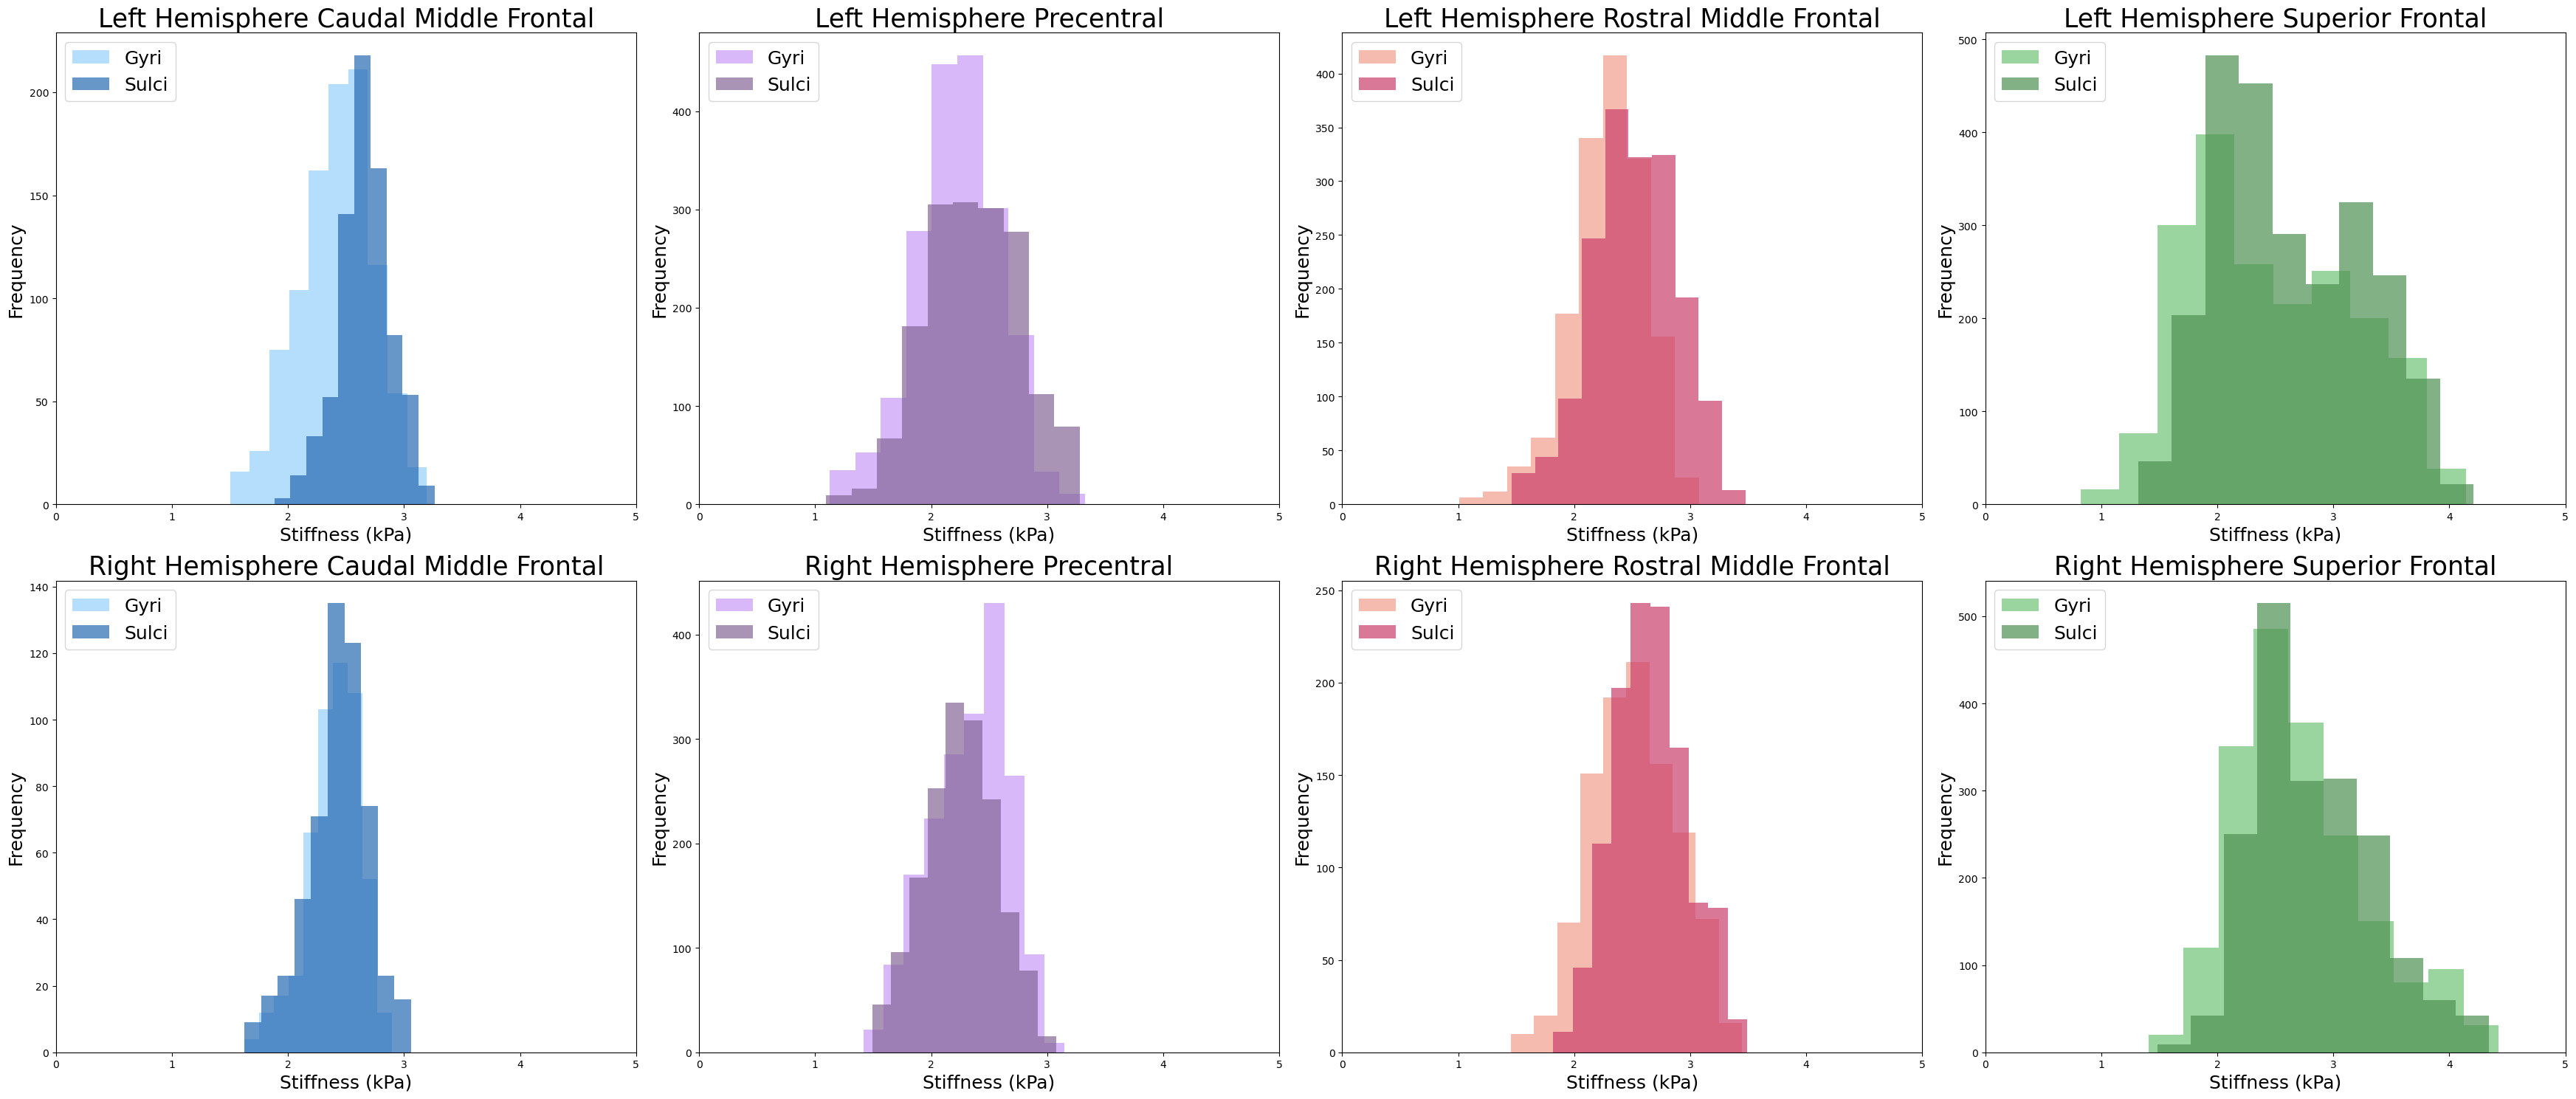

In [88]:
roi_his(roi_rh_gyri_mu, roi_rh_sulci_mu, roi_lh_gyri_mu, roi_lh_sulci_mu)

roi_his(roi_rh_gyri_mu, roi_rh_sulci_mu, roi_lh_gyri_mu, roi_lh_sulci_mu)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

axes = axes.flatten()

for idx, roi in enumerate(roi_sulci_mu.keys()):
    if idx < len(axes):
        # Get flattened data
        gyri_flat = roi_gyri_mu[roi].flatten()
        gyri_flat[gyri_flat == 0] = np.nan

        sulci_flat = roi_sulci_mu[roi].flatten()
        sulci_flat[sulci_flat == 0] = np.nan

        data = [gyri_flat/1000, sulci_flat/1000]

        sns.boxplot(data=data, palette='Accent', ax=axes[idx])

        axes[idx].set_xticklabels(['Gyri', 'Sulci'])
        axes[idx].set_ylabel('Stiffness (kPa)')
        axes[idx].set_title(f"ROI: {roi}")

plt.tight_layout()
plt.show()                      

In [90]:
for idx, roi in enumerate(roi_sulci_mu.keys()):
    print(f"{roi}:")

    roi_gyri_mu[roi][roi_gyri_mu[roi] == 0] = np.nan    
    gyri_flat = roi_gyri_mu[roi].flatten()

    roi_sulci_mu[roi][roi_sulci_mu[roi] == 0] = np.nan
    sulci_flat = roi_sulci_mu[roi].flatten()
    sulci_flat[sulci_flat == 0] = np.nan

    mean_gyri = np.nanmean(gyri_flat)
    mean_sulci = np.nanmean(sulci_flat)
    
    print(f'  gyri_{roi} mean: {mean_gyri}')
    print(f'  sulci_{roi} mean: {mean_sulci}')
    percent_diff = (abs(mean_gyri - mean_sulci) / ((mean_gyri + mean_sulci) / 2)) * 100
    print(f'  percent difference: {percent_diff:.2f}%')

    #observed = np.round(np.array([gyri_counts[idx],sulci_counts[idx]])).astype(int)
    observed = np.array([gyri_counts[idx],sulci_counts[idx]]).astype(int)
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

    N = np.sum(observed) 
    k = min(observed.shape)
    v = np.sqrt((chi2_stat) / N*(k-1)) 

    print(f"  Chi-Squared Statistic: {chi2_stat:.2f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Cramér’s V (Effect Size): {v:.3f}")

    
    ks_statistic, ks_p_value = stats.ranksums(gyri_flat,sulci_flat,nan_policy='omit')
    print(f"  KS P-value = : {ks_p_value}")

    mann_stat, mann_p_value = stats.mannwhitneyu(gyri_flat, sulci_flat, alternative='two-sided',nan_policy='omit')
    print(f"  Mann Whitney P-value = : {mann_p_value}")

    sucli_roi_meancurv = roi_data[idx]*meancurv_lh_sulci_orig
    sucli_roi_meancurv[sucli_roi_meancurv == 0] = np.nan
    sucli_roi_meancurv_flat = sucli_roi_meancurv.flatten()
    
    gyri_roi_meancurv = roi_data[idx]*meancurv_lh_gyri_orig
    gyri_roi_meancurv[gyri_roi_meancurv == 0] = np.nan
    gyri_roi_meancurv_flat = gyri_roi_meancurv.flatten()

    
    sulci_coor,sulci_sm_pvalue = stats.spearmanr(sucli_roi_meancurv_flat,roi_sulci_mu[roi].flatten() ,nan_policy='omit')
    print (f"  Spearmann Sulci Corr: {sulci_coor}")
    gyri_coor,gyri_sm_pvalue = stats.spearmanr(gyri_roi_meancurv_flat,roi_gyri_mu[roi].flatten() ,nan_policy='omit')
    print (f"  Spearmann Gyri Corr: {gyri_coor}")
    
    print('')

NameError: name 'roi_sulci_mu' is not defined

In [91]:
lh_g_precentral_mu = lh_g_precentral*mu
lh_s_precentral_mu = lh_s_precentral*mu
print(f'precentral gyri:{np.count_nonzero(lh_g_precentral_mu)}')
print(f'precentral sulci:{np.count_nonzero(lh_s_precentral_mu)}')

lh_s_central_mu = lh_s_central*mu
print(f'central sulci:{np.count_nonzero(lh_s_central_mu)}')
lh_g_postcentral_mu = lh_g_postcentral*mu
print(f'postcentral gyri:{np.count_nonzero(lh_g_postcentral_mu)}')

NameError: name 'lh_g_precentral' is not defined

In [ ]:
lh_g_precentral_mu[lh_g_precentral_mu == 0] = np.nan
lh_s_precentral_mu[lh_s_precentral_mu == 0] = np.nan
lh_s_central_mu[lh_s_central_mu == 0] = np.nan
lh_g_postcentral_mu[lh_g_postcentral_mu == 0] = np.nan

lh_g_precentral_flat = lh_g_precentral_mu.flatten()
lh_s_precentral_flat = lh_s_precentral_mu.flatten()
lh_s_central_flat = lh_s_central_mu.flatten()
lh_g_postcentral_flat = lh_g_postcentral_mu.flatten()

In [ ]:
lh_s_precentral_mean = np.nanmean(lh_s_precentral_mu)
lh_g_precentral_mean = np.nanmean(lh_g_precentral_mu)
print (f'precentral sulci mean: {lh_s_precentral_mean}')
print (f'precentral gyri mean: {lh_g_precentral_mean}')

percent_diff = (abs(lh_g_precentral_mean - lh_s_precentral_mean) / ((lh_g_precentral_mean + lh_s_precentral_mean) / 2)) * 100
print(f'precentral percent difference: {percent_diff:.2f}%')

lh_g_postcentral_mean = np.nanmean(lh_g_postcentral_mu)
lh_s_central_mean = np.nanmean(lh_s_central_mu)
print (f'central sulci mean: {lh_s_central_mean}')
print (f'postcentral gyri mean: {lh_g_postcentral_mean}')

In [ ]:
plt.figure(figsize=(10, 6))
gyri_counts, gyri_bin_edges, gyri_patches =plt.hist(lh_g_precentral_flat, bins=20, alpha=0.5, label='Precentral Gyri', color='Green')
sulci_counts, sulci_bin_edges, sulci_patches=plt.hist(lh_s_precentral_flat, bins=20, alpha=0.5, label='Precentral Sulci', color='Purple')
plt.legend(loc='best')
plt.xlabel('Stiffness (Pa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyri vs Sulci Stiffness')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
gyri_counts, gyri_bin_edges, gyri_patches =plt.hist(lh_g_precentral_flat, bins=20, alpha=0.5, label='Precentral Gyri', color='Blue')
sulci_counts, sulci_bin_edges, sulci_patches=plt.hist(lh_s_central_flat, bins=20, alpha=0.7, label='central Sulci', color='Yellow')

post_gyri_counts, post_gyri_bin_edges, post_gyri_patches =plt.hist(lh_g_postcentral_flat, bins=20, alpha=0.5, label='Postcentral Gyri', color='Green')
plt.legend(loc='best')
plt.xlabel('Stiffness (Pa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyri vs Sulci Stiffness')
plt.show()

In [ ]:
pc_mann_stat, pc_mann_p_value = stats.mannwhitneyu(lh_g_precentral_flat, lh_s_precentral_flat, alternative='two-sided',nan_policy='omit')
print(f" Mann Whitney P-value = : {pc_mann_p_value}")

In [ ]:
observed = np.array([gyri_counts,sulci_counts]).astype(int)
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.6f}")

In [ ]:
plt.figure(figsize=(10, 6))
gyri_counts, gyri_bin_edges, gyri_patches =plt.hist(lh_g_precentral_flat, bins=20, alpha=0.5, label='Precentral Gyri', color='Green')
sulci_counts, sulci_bin_edges, sulci_patches=plt.hist(lh_s_precentral_flat, bins=20, alpha=0.5, label='Precentral Sulci', color='Purple')
plt.legend(loc='best')
plt.xlabel('Stiffness (Pa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyri vs Sulci Stiffness')
plt.show()

In [ ]:
parital_roi_gyri_mu = {}
for i in range(len(parital_roi_data)):
    temp = parital_roi_name[i]
    parital_roi_gyri_mu[temp] = mu_lh_gyri * parital_roi_data[i]

parital_roi_sulci_mu = {}
for i in range(len(parital_roi_data)):
    temp = parital_roi_name[i]
    parital_roi_sulci_mu[temp] = mu_lh_sulci * parital_roi_data[i]

In [ ]:
parital_roi_sulci_mu.keys()

In [ ]:
for roi in parital_roi_sulci_mu.keys():
    print(f'gyri_{roi}: {np.count_nonzero(parital_roi_gyri_mu[roi])}')
    print(f'sulci_{roi}: {np.count_nonzero(parital_roi_sulci_mu[roi])}')
    print('')

In [ ]:
rows = 2
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

axes = axes.flatten()

gyri_counts = []
sulci_counts = []
for idx, roi in enumerate(parital_roi_sulci_mu.keys()):
    if idx < len(axes):
        gyri_flat = parital_roi_gyri_mu[roi].flatten()
        gyri_flat[gyri_flat == 0] = np.nan

        sulci_flat = parital_roi_sulci_mu[roi].flatten()
        sulci_flat[sulci_flat == 0] = np.nan
        
        gyri_count, gyri_bin_edges, gyri_patches = axes[idx].hist(gyri_flat/1000, bins=10, alpha=0.5, label='Gyri',color='Green')
        sulci_count, sulci_bin_edges, sulci_patches = axes[idx].hist(sulci_flat/1000, bins=10, alpha=0.5, label='Sulci', color='Purple')

        gyri_counts.append(gyri_count)
        sulci_counts.append(sulci_count)

        axes[idx].legend(loc='best')
        axes[idx].set_xlabel('Stiffness (kPa)')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f"ROI: {roi}")


plt.tight_layout()
plt.show()
                  